In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [2]:
df = pd.read_csv('urldata.csv', index_col="Unnamed: 0")

In [3]:
print("dataframe shape:", df.shape)
print("dataframe head:\n", df.head())

dataframe shape: (450176, 3)
dataframe head:
                          url   label  result
0     https://www.google.com  benign       0
1    https://www.youtube.com  benign       0
2   https://www.facebook.com  benign       0
3      https://www.baidu.com  benign       0
4  https://www.wikipedia.org  benign       0


# Missing values


In [4]:
df.isnull().sum()

url       0
label     0
result    0
dtype: int64

## Counts

In [5]:
df['-cnt'] = df['url'].str.count('-')
df['?cnt'] = df['url'].str.count('\?')
df['%cnt'] = df['url'].str.count('\%')
df['@cnt'] = df['url'].str.count('@')
df['=cnt'] = df['url'].str.count('=')
df['.cnt'] = df['url'].str.count('.')

df['httpcnt'] = df['url'].str.count('http')
df['httpscnt'] = df['url'].str.count('https')
df['wwwcnt'] = df['url'].str.count('www')

In [6]:
df['digitcnt'] = df['url'].str.count('\d')
df['lettercnt'] = df['url'].str.count('[A-Za-z]')
df['dircnt'] = df['url'].str.count('/') - 2

In [7]:
# Obtaining length of the url
df["length_of_url"] = df["url"].apply(lambda url: len(url))
# Obtaining length of path
df["length_of_path"] = df["url"].apply(lambda url: len("/".join(url.split("/")[3:])))
# Obtaining length of the hostname
df["length_of_hostname"] = df["url"].apply(lambda url: len(url.split("/")[2]))
# Obtaining length of the first directory
df["length_of_fd"] = df["url"].apply(lambda url: len(url.split("/")[3]) if len(url.split("/")) > 3 else 0)
# Obtaining length of the top level directory
df["length_of_td"] = df["url"].apply(lambda url: len(url.split("/")[2].split(".")[-1]))

In [8]:
def is_domain_an_ip(url):
    return url.split("/")[2].split(".")[-1].isdigit()

def is_domain_a_shortened_link(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df["is_ip"] = df["url"].apply(is_domain_an_ip)
df["is_shortened_link"] = df["url"].apply(is_domain_a_shortened_link)

In [9]:
df.head()

,url,label,result,-cnt,?cnt,%cnt,@cnt,=cnt,.cnt,httpcnt,...,digitcnt,lettercnt,dircnt,length_of_url,length_of_path,length_of_hostname,length_of_fd,length_of_td,is_ip,is_shortened_link
0,https://www.google.com,benign,0,0,0,0,0,0,22,1,...,0,17,0,22,0,14,0,3,False,0
1,https://www.youtube.com,benign,0,0,0,0,0,0,23,1,...,0,18,0,23,0,15,0,3,False,0
2,https://www.facebook.com,benign,0,0,0,0,0,0,24,1,...,0,19,0,24,0,16,0,3,False,0
3,https://www.baidu.com,benign,0,0,0,0,0,0,21,1,...,0,16,0,21,0,13,0,3,False,0
4,https://www.wikipedia.org,benign,0,0,0,0,0,0,25,1,...,0,20,0,25,0,17,0,3,False,0


# DATA VIS

Total number of malicious urls: 0.23199370912709696
Total number of benign urls: 0.7680062908729031


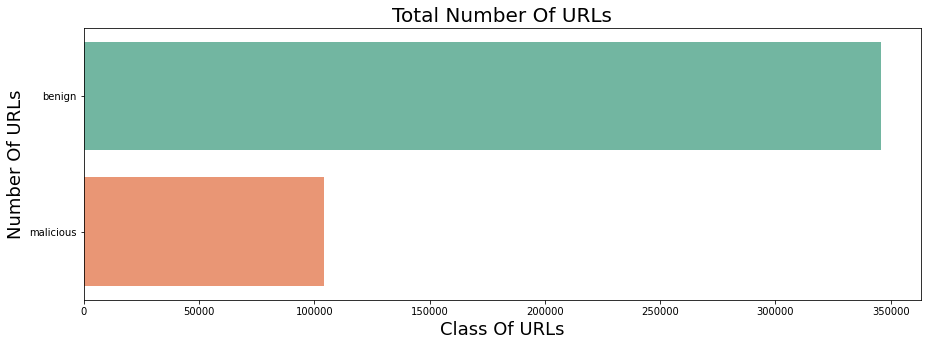

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='label',data=df, palette='Set2')
plt.title("Total Number Of URLs",fontsize=20)
plt.xlabel("Class Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

total_malicious = df[df['result'] == 1].shape[0]
total_benign = df[df['result'] == 0].shape[0]
print("Total number of malicious urls:", total_malicious/df.shape[0])
print("Total number of benign urls:", total_benign/df.shape[0])

<AxesSubplot: >

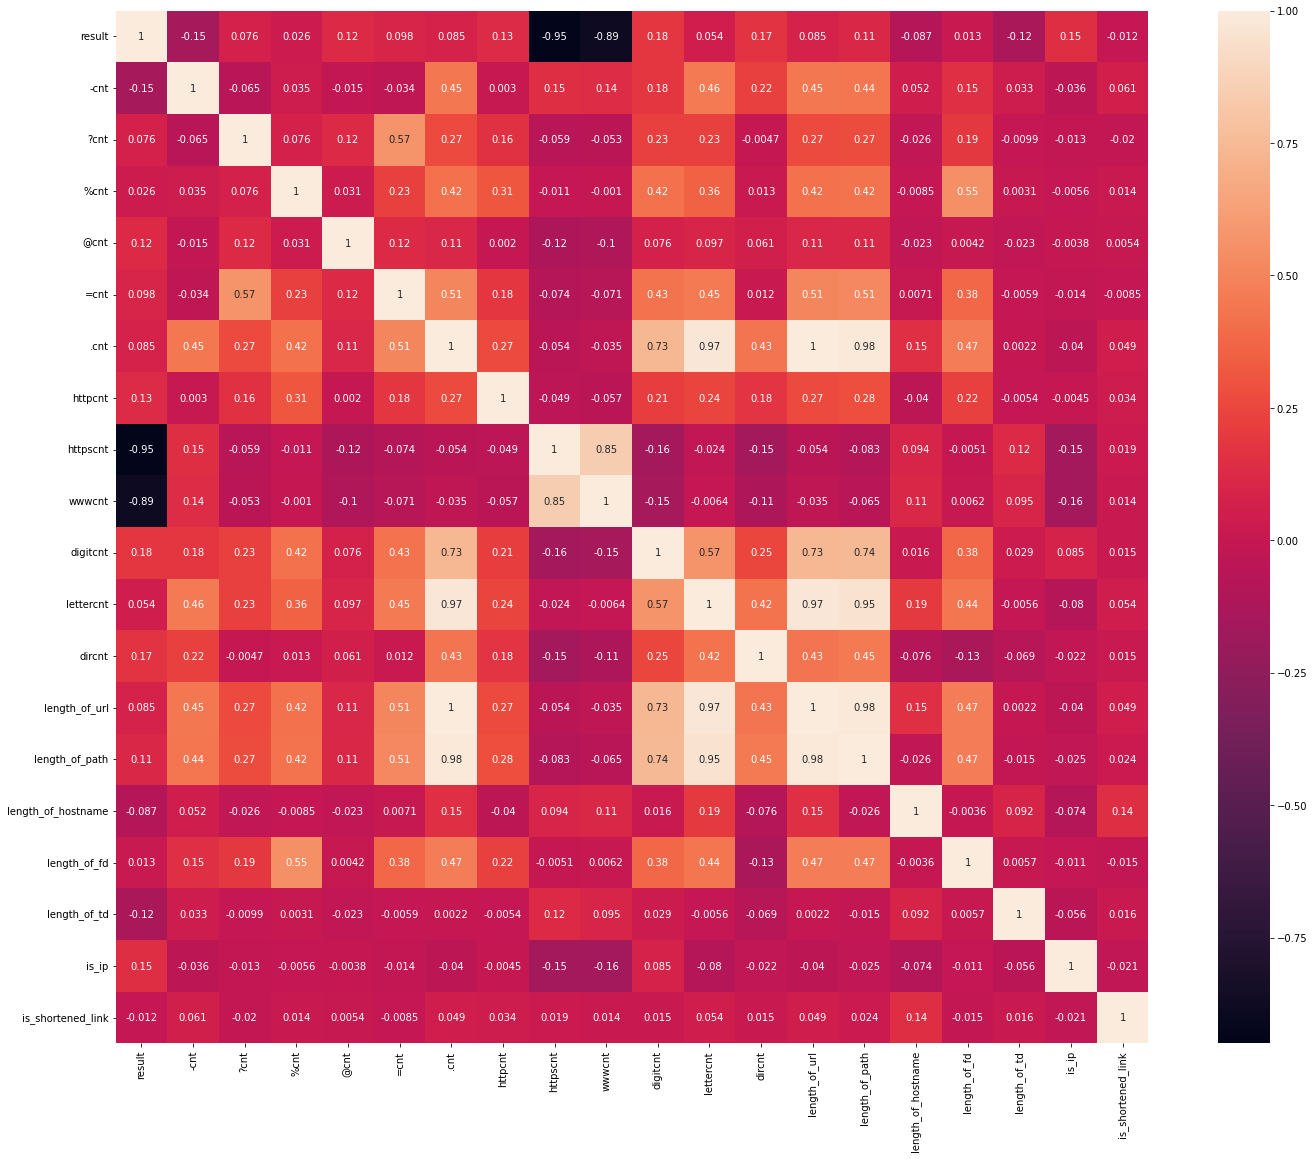

In [11]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

(0.0, 1000.0)

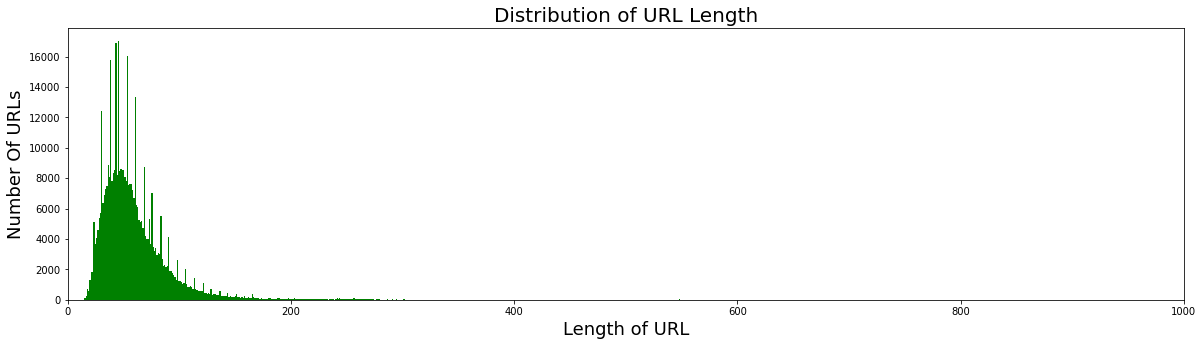

In [12]:
#Length of the URL 
plt.figure(figsize=(20,5))
plt.hist(df['length_of_url'],bins=2000,color='green')
plt.title("Distribution of URL Length",fontsize=20)
plt.xlabel("Length of URL",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.xlim(0,1000)

(0.0, 250.0)

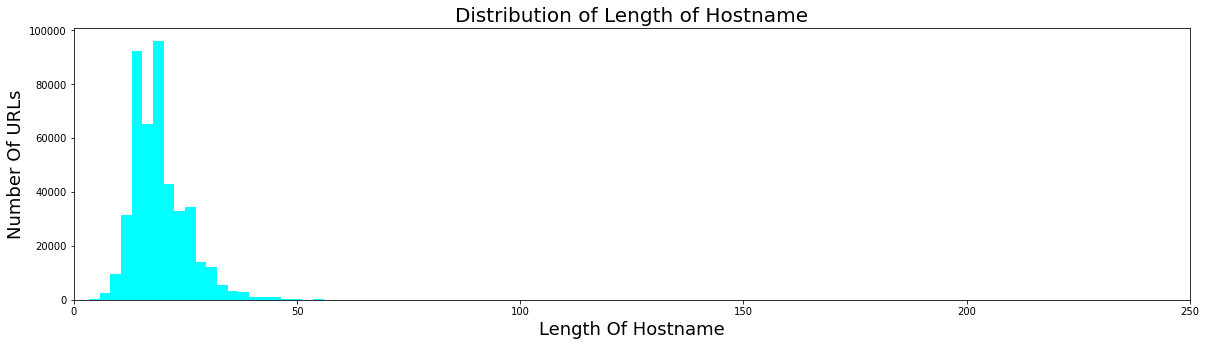

In [13]:
#length of the hostname
plt.figure(figsize=(20,5))
plt.hist(df['length_of_hostname'],bins=100,color='cyan')
plt.title("Distribution of Length of Hostname",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)
plt.xlim(0,250)

Text(0, 0.5, 'Number Of URLs')

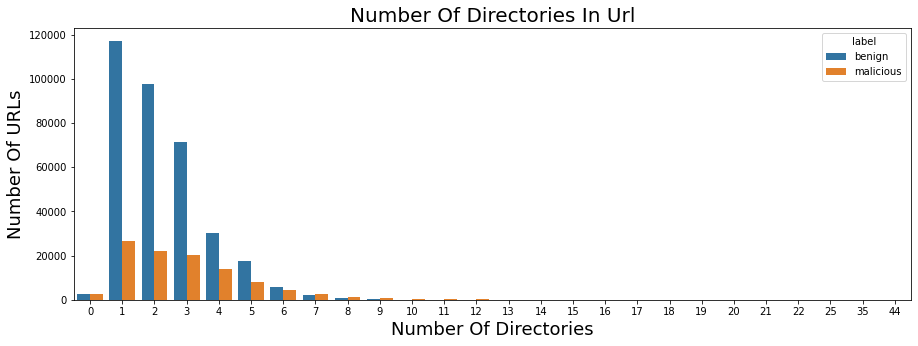

In [14]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='dircnt',data=df, hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Number of urls with IP: 2870


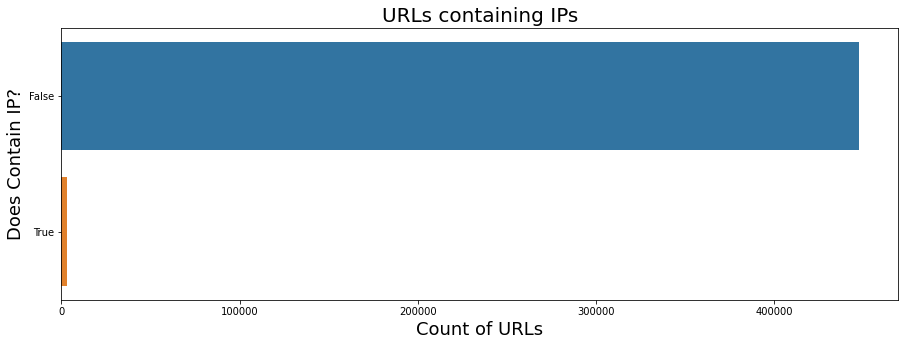

In [15]:
#URL with IP
plt.figure(figsize=(15,5))
plt.title("URLs containing IPs",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(y=df['is_ip'])
plt.ylabel("Does Contain IP?",fontsize=18)
plt.xlabel("Count of URLs",fontsize=18)

print("Number of urls with IP:", df[df['is_ip'] == 1].shape[0])

# Building the model 

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import VotingClassifier

In [17]:
#Independent Variables
x = df[['length_of_hostname',
       'length_of_path', 'length_of_fd', 'length_of_td', '-cnt', '@cnt', '?cnt',
       '%cnt', '.cnt', '=cnt', 'httpcnt', 'digitcnt', 'httpscnt', 'wwwcnt',
       'lettercnt', 'dircnt', 'is_ip']]

#Dependent Variable
y = df['result']

In [18]:
#Train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)
print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of x_train:  (360140, 17)
Shape of x_valid:  (90036, 17)
Shape of y_train:  (360140,)
Shape of y_valid:  (90036,)


0.9972233328890666
0.9917709335899904
0.9961813611755607
0.9939712549435709


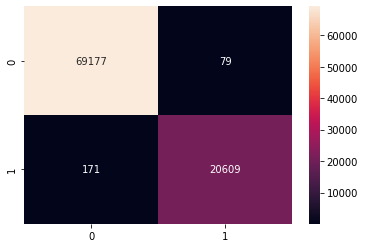

In [19]:
#XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

xg_predictions = xgb_model.predict(x_test)
print(accuracy_score(y_test,xg_predictions))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, precision_score

cm = confusion_matrix(y_test, xg_predictions)   

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

print(recall_score(y_test,xg_predictions))
print(precision_score(y_test,xg_predictions))
print(f1_score(y_test,xg_predictions))

In [21]:
#Desicion Tree
DTC_Classifier = tree.DecisionTreeClassifier()
DTC_Classifier.fit(x_train, y_train);

#Random Forest Classifier
RF_Classifier = RandomForestClassifier()
RF_Classifier.fit(x_train, y_train);  

#Logistic Regression
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(x_train, y_train);

combined_model = [('XGBOOST Classifier', xgb_model), 
                  ('Decision Tree Classifier', DTC_Classifier), 
                  ('Random Forest Classifier', RF_Classifier), 
                  ('LogisticRegression', LGR_Classifier)
                 ]

vc =  VotingClassifier(estimators = combined_model)
vc.fit(x_train, y_train);

C:\Users\priyanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\priyanshu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

accuracy score:
0.9958349993335999
recall_score: 
0.9904716073147257

precision_score:
0.991473577725324

f1_score: 
0.9909723392474542


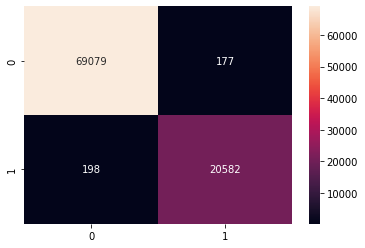

In [41]:
#Desicion tree
dt_predictions = DTC_Classifier.predict(x_test) 
print('accuracy score:')
print(accuracy_score(y_test,dt_predictions))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, precision_score

dt_cm = confusion_matrix(y_test, dt_predictions)
ax= plt.subplot()
sns.heatmap(dt_cm, annot=True, ax=ax, fmt = 'g')
print('recall_score: ')
print(recall_score(y_test,dt_predictions))
print()
print('precision_score:')
print(precision_score(y_test,dt_predictions))
print()
print('f1_score: ')
print(f1_score(y_test,dt_predictions))

accuracy_score:
0.9972233328890666

recall_score: 
0.9919153031761309

precision_score: 
0.9960374987919204

f1_score: 
0.9939721271157834


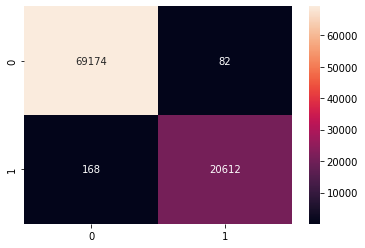

In [42]:
#Random Forest 
RF_predictions = RF_Classifier.predict(x_test) 
print('accuracy_score:')
print(accuracy_score(y_test,RF_predictions))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, precision_score

rf_cm = confusion_matrix(y_test, RF_predictions)
ax= plt.subplot()
sns.heatmap(rf_cm, annot=True, ax=ax, fmt ='g')
print()
print('recall_score: ')
print(recall_score(y_test,RF_predictions))
print()
print('precision_score: ')
print(precision_score(y_test,RF_predictions))
print()
print('f1_score: ')
print(f1_score(y_test,RF_predictions))

accuracy_score:
0.9947021191523391

recall_score: 
0.9853705486044273

precision_score: 
0.9916218703084895

f1_score: 
0.9884863260035239


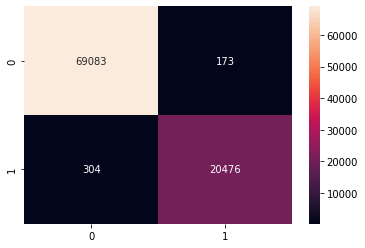

In [43]:
#Logistic Regressions 
LGR_predictions = LGR_Classifier.predict(x_test) 
print('accuracy_score:')
print(accuracy_score(y_test,LGR_predictions))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, precision_score

lgr_cm = confusion_matrix(y_test, LGR_predictions)
ax= plt.subplot()
sns.heatmap(lgr_cm, annot=True, ax=ax, fmt ='g')
print()
print('recall_score: ')
print(recall_score(y_test,LGR_predictions))
print()
print('precision_score: ')
print(precision_score(y_test,LGR_predictions))
print()
print('f1_score: ')
print(f1_score(y_test,LGR_predictions))

accuracy_score:
0.9947021191523391

recall_score: 
0.9853705486044273

precision_score: 
0.9916218703084895

f1_score: 
0.9884863260035239


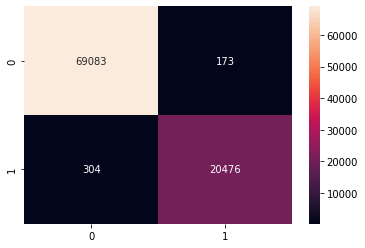

In [44]:
#ensemble model 
VC_predictions = LGR_Classifier.predict(x_test) 
print('accuracy_score:')
print(accuracy_score(y_test,VC_predictions))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, precision_score

vc_cm = confusion_matrix(y_test, VC_predictions)
ax= plt.subplot()
sns.heatmap(vc_cm, annot=True, ax=ax, fmt ='g')
print()
print('recall_score: ') 
print(recall_score(y_test,VC_predictions))
print()
print('precision_score: ')
print(precision_score(y_test,VC_predictions))
print()
print('f1_score: ')
print(f1_score(y_test,VC_predictions))